Andrea Monninger and Jasmine Merrill

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [36]:
# put files into google colab files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [37]:
df_train.tail()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [38]:
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [39]:
df_train.drop("Patient Id",axis=1,inplace=True)
df_train.drop("Family Name",axis=1,inplace=True)
df_train.drop("Patient First Name",axis=1,inplace=True)
df_train.drop("Father's name",axis=1,inplace=True)
df_train.drop("Institute Name",axis=1,inplace=True)
df_train.drop("Location of Institute",axis=1,inplace=True)
df_train.drop("Place of birth",axis=1,inplace=True)

In [40]:
df_train.isna().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Parental consent                                    2125
Follow-up                      

In [41]:
# changing nulls to modes
df_train["Patient Age"].fillna(str(df_train["Patient Age"].mode().values[0]),inplace=True)
df_train["Inherited from father"].fillna(str(df_train["Inherited from father"].mode().values[0]),inplace=True)
df_train["Maternal gene"].fillna(str(df_train["Maternal gene"].mode().values[0]),inplace=True)
df_train["Mother's age"].fillna(str(df_train["Mother's age"].mode().values[0]),inplace=True)
df_train["Father's age"].fillna(str(df_train["Father's age"].mode().values[0]),inplace=True)
df_train["Respiratory Rate (breaths/min)"].fillna(str(df_train["Respiratory Rate (breaths/min)"].mode().values[0]),inplace=True)
df_train["Heart Rate (rates/min"].fillna(str(df_train["Heart Rate (rates/min"].mode().values[0]),inplace=True)
df_train["Test 1"].fillna(str(df_train["Test 1"].mode().values[0]),inplace=True)
df_train["Test 2"].fillna(str(df_train["Test 2"].mode().values[0]),inplace=True)
df_train["Test 3"].fillna(str(df_train["Test 3"].mode().values[0]),inplace=True)
df_train["Test 4"].fillna(str(df_train["Test 4"].mode().values[0]),inplace=True)
df_train["Test 5"].fillna(str(df_train["Test 5"].mode().values[0]),inplace=True)
df_train["Parental consent"].fillna(str(df_train["Parental consent"].mode().values[0]),inplace=True)
df_train["Follow-up"].fillna(str(df_train["Follow-up"].mode().values[0]),inplace=True)
df_train["Gender"].fillna(str(df_train["Gender"].mode().values[0]),inplace=True)
df_train["Birth asphyxia"].fillna(str(df_train["Birth asphyxia"].mode().values[0]),inplace=True)
df_train["Autopsy shows birth defect (if applicable)"].fillna(str(df_train["Autopsy shows birth defect (if applicable)"].mode().values[0]),inplace=True)
df_train["Folic acid details (peri-conceptional)"].fillna(str(df_train["Folic acid details (peri-conceptional)"].mode().values[0]),inplace=True)
df_train["H/O serious maternal illness"].fillna(str(df_train["H/O serious maternal illness"].mode().values[0]),inplace=True)
df_train["H/O radiation exposure (x-ray)"].fillna(str(df_train["H/O radiation exposure (x-ray)"].mode().values[0]),inplace=True)
df_train["H/O substance abuse"].fillna(str(df_train["H/O substance abuse"].mode().values[0]),inplace=True)
df_train["Assisted conception IVF/ART"].fillna(str(df_train["Assisted conception IVF/ART"].mode().values[0]),inplace=True)
df_train["History of anomalies in previous pregnancies"].fillna(str(df_train["History of anomalies in previous pregnancies"].mode().values[0]),inplace=True)
df_train["No. of previous abortion"].fillna(str(df_train["No. of previous abortion"].mode().values[0]),inplace=True)
df_train["Birth defects"].fillna(str(df_train["Birth defects"].mode().values[0]),inplace=True)
df_train["White Blood cell count (thousand per microliter)"].fillna(str(df_train["White Blood cell count (thousand per microliter)"].mode().values[0]),inplace=True)
df_train["Blood test result"].fillna(str(df_train["Blood test result"].mode().values[0]),inplace=True)
df_train["Symptom 1"].fillna(str(df_train["Symptom 1"].mode().values[0]),inplace=True)
df_train["Symptom 2"].fillna(str(df_train["Symptom 2"].mode().values[0]),inplace=True)
df_train["Symptom 3"].fillna(str(df_train["Symptom 3"].mode().values[0]),inplace=True)
df_train["Symptom 4"].fillna(str(df_train["Symptom 4"].mode().values[0]),inplace=True)
df_train["Symptom 5"].fillna(str(df_train["Symptom 5"].mode().values[0]),inplace=True)
df_train["Genetic Disorder"].fillna(str(df_train["Genetic Disorder"].mode().values[0]),inplace=True)
df_train["Disorder Subclass"].fillna(str(df_train["Disorder Subclass"].mode().values[0]),inplace=True)

In [42]:
df_train.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Parental consent                                    0
Follow-up                                           0
Gender                      

In [43]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             22083 non-null  object 
 3   Maternal gene                                     22083 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [45]:
for column in df_train:
    columnSeriesObj = df_train[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)
    print("---------------------------------------------")

Column Name :  Patient Age
Column Contents :  [2.0 4.0 6.0 ... 8.0 7.0 11.0]
---------------------------------------------
Column Name :  Genes in mother's side
Column Contents :  ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
---------------------------------------------
Column Name :  Inherited from father
Column Contents :  ['No' 'Yes' 'No' ... 'No' 'No' 'No']
---------------------------------------------
Column Name :  Maternal gene
Column Contents :  ['Yes' 'No' 'No' ... 'Yes' 'Yes' 'No']
---------------------------------------------
Column Name :  Paternal gene
Column Contents :  ['No' 'No' 'No' ... 'No' 'Yes' 'No']
---------------------------------------------
Column Name :  Blood cell count (mcL)
Column Contents :  [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
---------------------------------------------
Column Name :  Mother's age
Column Contents :  ['23.0' '23.0' 41.0 ... 35.0 19.0 32.0]
---------------------------------------------
Column Name :  Father

In [46]:
# changing categorical values to numerical values
df_train["Genes in mother's side"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Genes in mother's side"]]
df_train["Inherited from father"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Inherited from father"]]
df_train["Maternal gene"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Maternal gene"]]
df_train["Paternal gene"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Paternal gene"]]
df_train["Parental consent"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Parental consent"]]
df_train["Birth asphyxia"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Birth asphyxia"]]
df_train["Folic acid details (peri-conceptional)"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Folic acid details (peri-conceptional)"]]
df_train["H/O radiation exposure (x-ray)"]=[1 if i.strip()== "Yes" else 0 for i in df_train["H/O radiation exposure (x-ray)"]]
df_train["H/O substance abuse"]=[1 if i.strip()== "Yes" else 0 for i in df_train["H/O substance abuse"]]
df_train["Assisted conception IVF/ART"]=[1 if i.strip()== "Yes" else 0 for i in df_train["Assisted conception IVF/ART"]]
df_train["History of anomalies in previous pregnancies"]=[1 if i.strip()== "Yes" else 0 for i in df_train["History of anomalies in previous pregnancies"]]
df_train["H/O serious maternal illness"]=[1 if i.strip()=="Yes" else 0 for i in df_train["H/O serious maternal illness"]]

In [47]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,1,1,0,0,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,1,0,0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,1,0,1,0,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,1,0,1,1,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [49]:
for column in df_train:
    columnSeriesObj = df_train[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)
    print("---------------------------------------------")

Column Name :  Patient Age
Column Contents :  [2.0 4.0 6.0 ... 8.0 7.0 11.0]
---------------------------------------------
Column Name :  Genes in mother's side
Column Contents :  [1 1 1 ... 1 1 1]
---------------------------------------------
Column Name :  Inherited from father
Column Contents :  [0 1 0 ... 0 0 0]
---------------------------------------------
Column Name :  Maternal gene
Column Contents :  [1 0 0 ... 1 1 0]
---------------------------------------------
Column Name :  Paternal gene
Column Contents :  [0 0 0 ... 0 1 0]
---------------------------------------------
Column Name :  Blood cell count (mcL)
Column Contents :  [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
---------------------------------------------
Column Name :  Mother's age
Column Contents :  ['23.0' '23.0' 41.0 ... 35.0 19.0 32.0]
---------------------------------------------
Column Name :  Father's age
Column Contents :  ['20.0' 23.0 22.0 ... 51.0 '20.0' 62.0]
-----------------

In [50]:
print("Status: ",df_train["Status"].unique())
print("Respiratory Rate (breaths/min): ",df_train["Respiratory Rate (breaths/min)"].unique())
print("Heart Rate (rates/min: ",df_train["Heart Rate (rates/min"].unique())
print("Follow-up: ",df_train["Follow-up"].unique())
print("Gender: ",df_train["Gender"].unique())
print("Autopsy shows birth defect (if applicable): ",df_train["Autopsy shows birth defect (if applicable)"].unique())
print("Birth defects: ",df_train["Birth defects"].unique())
print("Blood test result: ",df_train["Blood test result"].unique())
print("Genetic Disorder: ",df_train["Genetic Disorder"].unique())
print("Disorder Subclass: ",df_train["Disorder Subclass"].unique())

Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect (if applicable):  ['Not applicable' 'None' 'No' 'Yes']
Birth defects:  ['Singular' 'Multiple']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [51]:
# changing categorical values to numerical values
#Alive':1 'Deceased:0'
df_train["Status"]=[1 if i.strip()== "Alive" else 0 for i in df_train["Status"]]
#Normal (30-60):1' 'Tachypnea:0
df_train["Respiratory Rate (breaths/min)"]=[1 if i.strip()== "Normal (30-60)" else 0 for i in df_train["Respiratory Rate (breaths/min)"]]
#Normal:1' 'Tachycardia:0
df_train["Heart Rate (rates/min"]=[1 if i.strip()== "Normal" else 0 for i in df_train["Heart Rate (rates/min"]]
#High:1, Low:0
df_train["Follow-up"]=[1 if i.strip()== "High" else 0 for i in df_train["Follow-up"]]
#['Singular' 'Multiple']
df_train["Birth defects"]=[1 if i.strip()== "Singular" else 0 for i in df_train["Birth defects"]]

In [52]:
#1: male 0: female 2: ambiguous    
df_train["Gender"]=[1 if i.strip()== "Male" else 0 if i.strip() == "Female" else 2 for i in df_train["Gender"]]

In [53]:
df_train.Gender.unique()

array([2, 1, 0])

In [54]:
#Not applicable:3' 'None:2' 'No:0' 'Yes:1'
df_train["Autopsy shows birth defect (if applicable)"]=[1 if i.strip()== "Yes" else 0 if i.strip() == "No" else 2 if i.strip()=="None" else 3 for i in df_train["Autopsy shows birth defect (if applicable)"]]

In [55]:
df_train["Autopsy shows birth defect (if applicable)"].unique()

array([3, 2, 0, 1])

In [56]:
#'slightly abnormal':1, 'normal':0, 'inconclusive':2 'abnormal:3']
df_train["Blood test result"]=[1 if i.strip()== "slightly abnormal" else 0 if i.strip() == "normal" else 2 if i.strip()=="inconclusive" else 3 for i in df_train["Blood test result"]]

In [57]:
df_train["Blood test result"].unique()

array([1, 0, 2, 3])

In [58]:
#'Mitochondrial genetic inheritance disorders':1,'Multifactorial genetic inheritance disorders':0'Single-gene inheritance diseases:2'
df_train["Genetic Disorder"]=[1 if i.strip()== "Mitochondrial genetic inheritance disorders" else 0 if i.strip() == "Multifactorial genetic inheritance disorders" else 2 for i in df_train["Genetic Disorder"]]

In [59]:
df_train["Genetic Disorder"].unique()

array([1, 0, 2])

In [60]:
#Leber's hereditary optic neuropathy:1 
#Cystic fibrosis:0
#Diabetes:2
#Leigh syndrome:3
#Cancer:4
#Tay-Sachs:5
#Hemochromatosis:6
#Mitochondrial myopathy:7
#Alzheimer's:8
df_train["Disorder Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy" 
                                else 0 if i.strip() == "Cystic fibrosis" 
                               else 2 if i.strip()=="Diabetes" 
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in df_train["Disorder Subclass"]]

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  int64  
 2   Inherited from father                             22083 non-null  int64  
 3   Maternal gene                                     22083 non-null  int64  
 4   Paternal gene                                     22083 non-null  int64  
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  int64  
 9   Respiratory Rate 

In [62]:
# changing all data types to float
df_train = df_train.apply(pd.to_numeric,downcast="float")

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

In [64]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,1.0,9.857562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,0.0,5.522560,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,1.0,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,1.0,7.919321,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,0.0,4.098210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [65]:
# adding column
df_train["sum of Mother's and fathers age avg"]=(df_train["Mother's age"]+df_train["Father's age"]) / 2

In [66]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,9.857562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.5
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,5.522560,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,23.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,31.5
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,7.919321,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,20.5
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,4.098210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26.0


In [67]:
# adding column
#total symptom
df_train["total symptom"]=(df_train["Symptom 1"]+df_train["Symptom 2"]+df_train["Symptom 3"]+df_train["Symptom 4"]+df_train["Symptom 5"]) / 5

In [68]:
df_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg,total symptom
0,2.0,1.0,0.0,1.0,0.0,4.760603,23.0,20.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.5,1.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,23.0,23.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,23.0,0.8
2,6.0,1.0,0.0,0.0,0.0,4.893297,41.0,22.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,31.5,0.8
3,12.0,1.0,0.0,1.0,0.0,4.705280,21.0,20.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,20.5,0.2
4,11.0,1.0,0.0,1.0,1.0,4.720703,32.0,20.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26.0,0.0


In [34]:
# TEAM ADDITION: adding 2 more columns
#df_train['Avg test'] = (df_train["Test 1"]+df_train["Test 2"]+df_train["Test 3"]+df_train["Test 4"]+df_train["Test 5"]) / 5
#df_train['From both parents'] = df_train["Genes in mother's side"] + df_train["Inherited from father"]

In [69]:
df_train.describe()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg,total symptom
count,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,...,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,6.781959,0.595164,0.391432,0.609383,0.433591,4.898871,31.375900,36.016708,0.501879,0.553095,...,1.444052,0.632251,0.596975,0.580356,0.450120,0.416882,1.253272,3.667980,33.696304,0.535317
std,4.241088,0.490871,0.488082,0.487900,0.495581,0.199663,9.845254,14.807540,0.500008,0.497184,...,1.067584,0.482203,0.490517,0.493512,0.497517,0.493054,0.613765,2.364828,9.129560,0.224115
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.092727,18.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,4.763108,23.000000,20.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,26.000000,0.400000
50%,6.000000,1.000000,0.000000,1.000000,0.000000,4.899399,28.000000,33.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,33.500000,0.600000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,5.033830,40.000000,49.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,40.500000,0.600000
max,14.000000,1.000000,1.000000,1.000000,1.000000,5.609829,51.000000,64.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,57.500000,1.000000


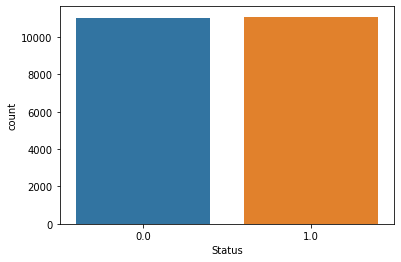

In [70]:
sns.countplot(df_train.Status,label="count")
plt.show()

In [71]:
# we are doing machine learning to predict alive or deceased status
df_train.Status.value_counts()

1.0    11083
0.0    11000
Name: Status, dtype: int64

In [72]:
df_train.corr()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,sum of Mother's and fathers age avg,total symptom
Patient Age,1.000000,0.003452,-0.008275,0.001492,-0.004422,0.010155,0.008203,-0.000949,0.007764,-0.011186,...,0.004462,0.000006,0.007062,-0.019291,-0.006475,-0.010584,0.005872,0.003171,0.003653,-0.012933
Genes in mother's side,0.003452,1.000000,0.008960,0.089605,-0.007389,-0.002403,0.010247,0.000520,-0.000221,-0.001917,...,0.009318,-0.000321,0.001120,0.006801,0.011139,0.013832,-0.068655,-0.135966,0.005947,0.014380
Inherited from father,-0.008275,0.008960,1.000000,0.009222,0.095115,-0.007677,0.006349,0.003769,-0.012293,0.011765,...,0.008831,-0.004460,-0.001561,0.008348,0.006371,0.020789,-0.067767,-0.125198,0.006480,0.013050
Maternal gene,0.001492,0.089605,0.009222,1.000000,0.011829,0.008119,-0.004247,-0.022747,0.003566,-0.003921,...,0.004294,0.009778,0.008800,0.015639,0.006853,0.011676,-0.056601,-0.121280,-0.020737,0.023127
Paternal gene,-0.004422,-0.007389,0.095115,0.011829,1.000000,-0.003494,-0.001070,0.000636,0.013799,0.000572,...,0.010374,0.010270,0.000180,-0.002390,0.011039,0.006553,-0.049738,-0.114605,-0.000061,0.011230
Blood cell count (mcL),0.010155,-0.002403,-0.007677,0.008119,-0.003494,1.000000,-0.001129,-0.003498,0.003149,0.002200,...,-0.004756,0.002585,-0.005347,0.003888,0.004455,0.002684,0.004781,-0.009202,-0.003446,0.003643
Mother's age,0.008203,0.010247,0.006349,-0.004247,-0.001070,-0.001129,1.000000,0.059002,-0.001519,-0.008097,...,-0.003693,-0.020455,-0.021779,-0.003388,0.010563,0.024325,0.008263,-0.002519,0.587045,-0.004435
Father's age,-0.000949,0.000520,0.003769,-0.022747,0.000636,-0.003498,0.059002,1.000000,-0.000087,-0.030954,...,0.008176,-0.018103,-0.026051,-0.007673,0.016978,0.031040,0.009774,0.006047,0.842781,-0.001377
Status,0.007764,-0.000221,-0.012293,0.003566,0.013799,0.003149,-0.001519,-0.000087,1.000000,0.008206,...,-0.001479,0.010473,0.001242,0.006958,0.003699,0.001598,0.003983,-0.013107,-0.000889,0.010460
Respiratory Rate (breaths/min),-0.011186,-0.001917,0.011765,-0.003921,0.000572,0.002200,-0.008097,-0.030954,0.008206,1.000000,...,-0.000738,0.013919,-0.002498,-0.002670,-0.004351,0.001701,-0.010160,0.004364,-0.029468,0.002536


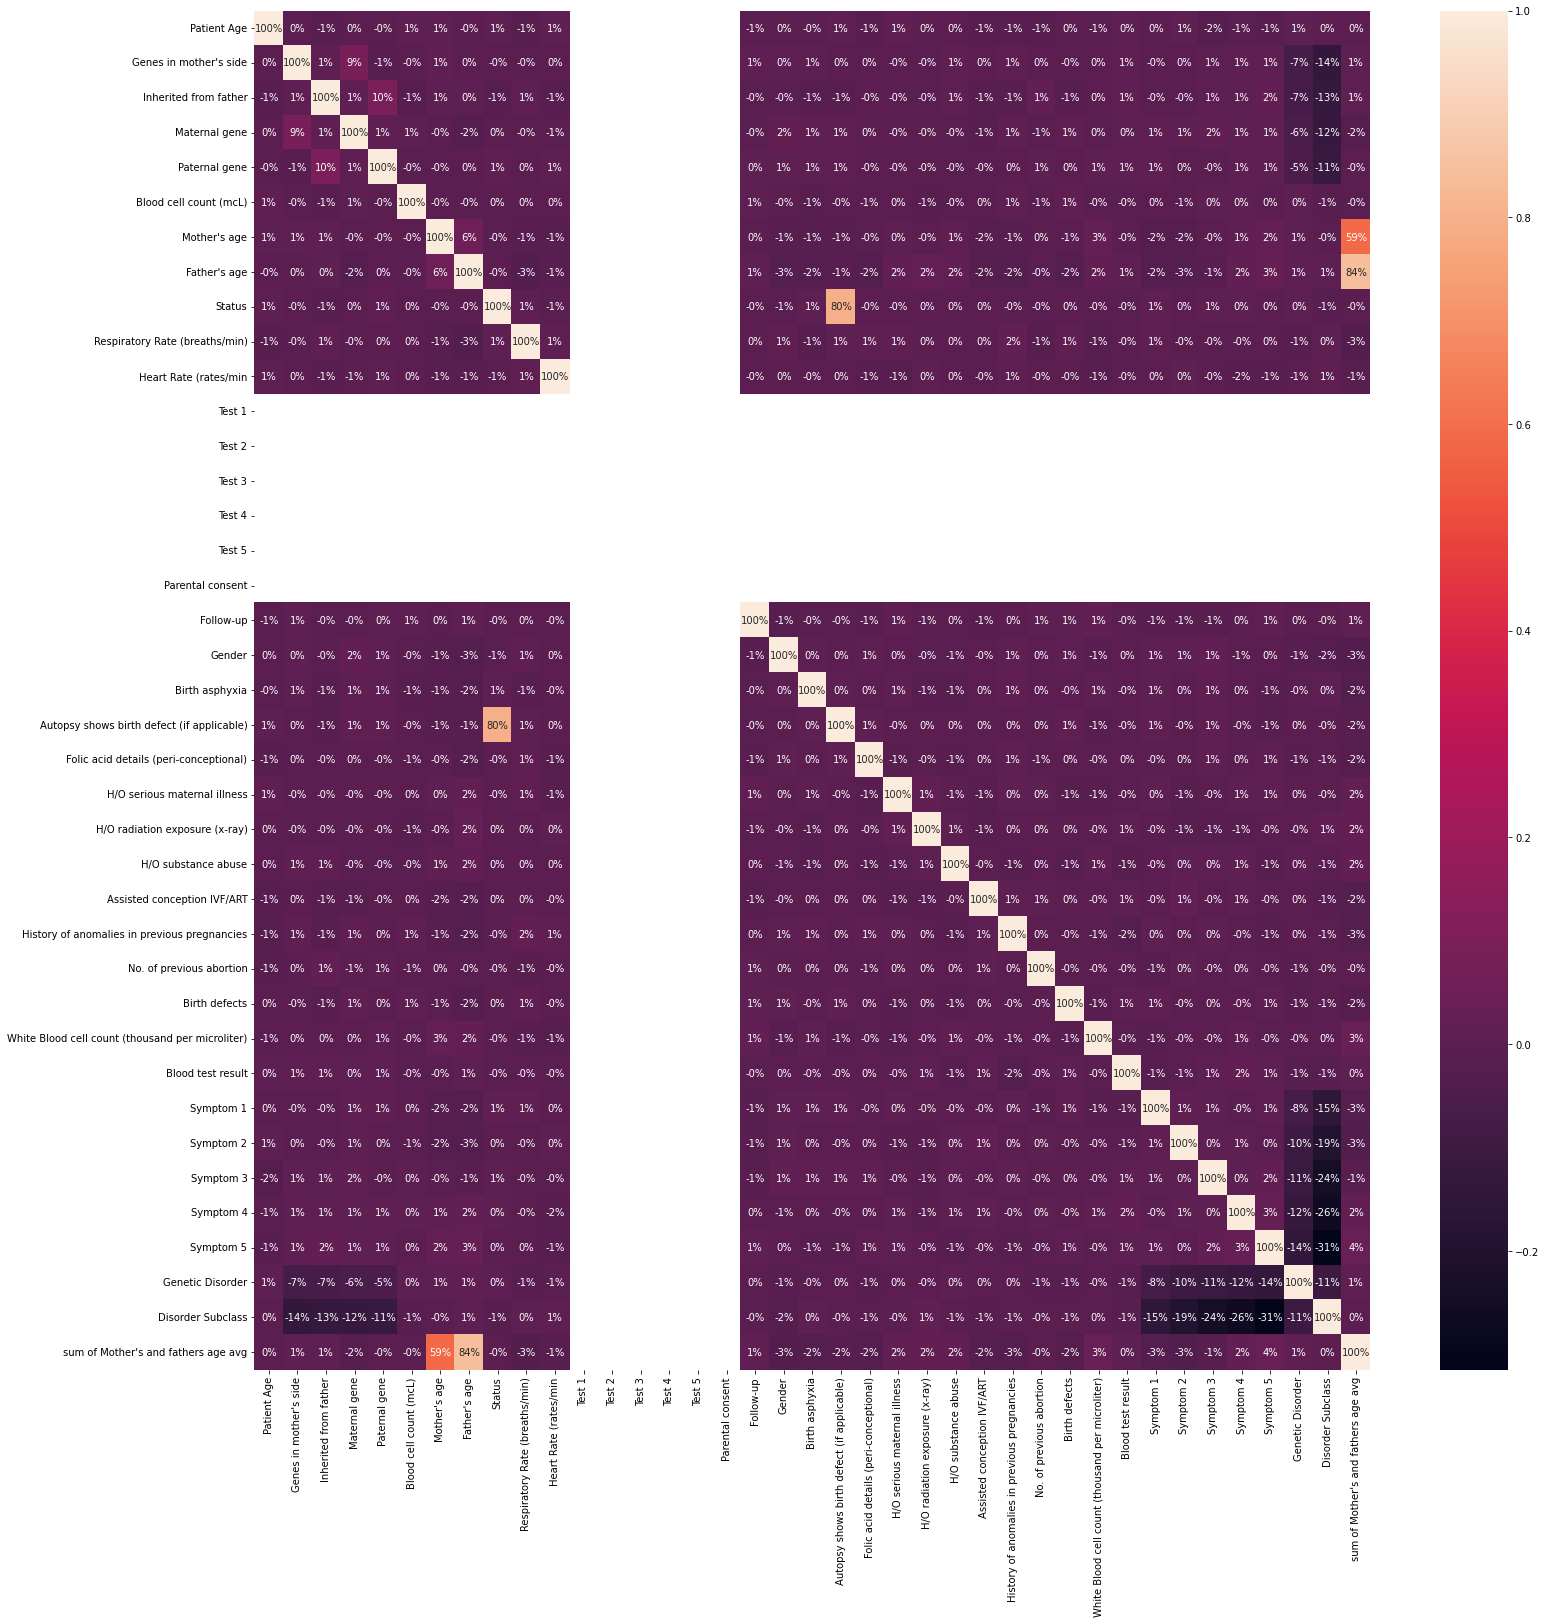

In [73]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.iloc[:,0:39].corr(),annot=True,fmt=".0%")
plt.show()

**Splitting data into Training and Splitting**

In [74]:
X,y = df_train.loc[:,df_train.columns != 'Status'], df_train.loc[:,'Status']

In [75]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((17666, 39), (4417, 39))

In [77]:
# check the shape of Y_train and Y_test

X_train.shape, X_test.shape

((17666, 39), (4417, 39))

**Feature Scaling**

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [80]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(probability=True) 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters:', accuracy_score(Y_test, y_pred))

# SVC AUC Score
from sklearn import metrics 
y_pred_proba_svc = svc.predict_proba(X_test)[::,1]
auc_svc = metrics.roc_auc_score(Y_test, y_pred_proba_svc)
print("SVC AUC score:", auc_svc)

Model accuracy score with default hyperparameters: 0.9492830188679245
SVC AUC score: 0.9561790887857706


**Run SVM with rbf kernel and C=100.0**
We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [81]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0, probability=True) 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 :', accuracy_score(Y_test, y_pred))

# SVC C=100 AUC Score
from sklearn import metrics 
y_pred_proba_svc = svc.predict_proba(X_test)[::,1]
auc_svc = metrics.roc_auc_score(Y_test, y_pred_proba_svc)
print("SVC AUC score:", auc_svc)

Model accuracy score with rbf kernel and C=100.0 : 0.9539622641509434
SVC AUC score: 0.9590315774201087


**LINEAR SVM**

Run SVM with linear kernel and c= 1.0

In [82]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0, probability=True) 


# fit classifier to training set
linear_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 :', accuracy_score(Y_test, y_pred_test))

# SVC C=1 AUC Score
from sklearn import metrics 
y_pred_proba_svc = svc.predict_proba(X_test)[::,1]
auc_svc2 = metrics.roc_auc_score(Y_test, y_pred_proba_svc)
print("SVC AUC score:", auc_svc2)

Model accuracy score with linear kernel and C=1.0 : 0.9539622641509434
SVC AUC score: 0.9590315774201087


**Run SVM with linear kernel and C=100.0**


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0, probability=True)


# fit classifier to training set
linear_svc100.fit(X_train, Y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 :', (accuracy_score(Y_test, y_pred)))

# SVC C=100 and linear AUC Score
from sklearn import metrics 
y_pred_proba_svc = svc.predict_proba(X_test)[::,1]
auc_svc3 = metrics.roc_auc_score(Y_test, y_pred_proba_svc)
print("SVC AUC score:", auc_svc3)

Model accuracy score with linear kernel and C=100.0 : 0.9539622641509434


**DS 340 Implementation**

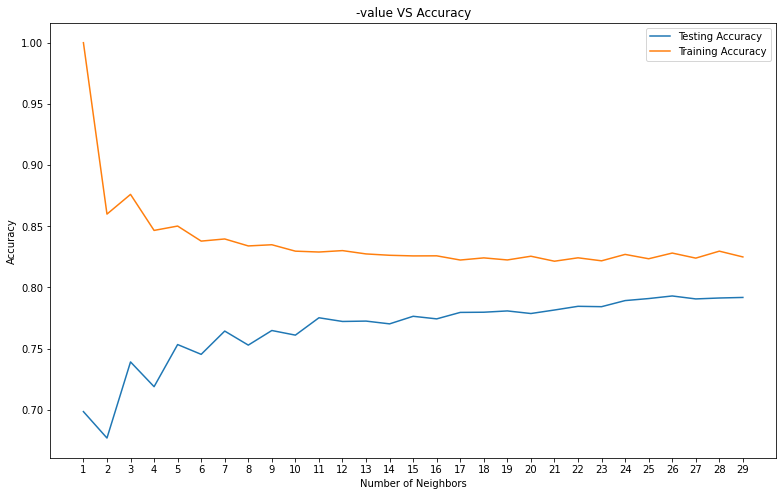

Best accuracy is 0.7930566037735849 with K = 26


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
neig = np.arange(1, 30)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, Y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
# double cheacking above score
knn2 = KNeighborsClassifier(n_neighbors=26)
# Fit with knn
knn2.fit(X_train,Y_train)
y_pred_knn = knn2.predict(X_test)
print("KNN accuracy score:", accuracy_score(Y_test, y_pred_knn))

# KNN AUC Score
from sklearn import metrics 
y_pred_proba_knn = knn2.predict_proba(X_test)[::,1]
auc_knn = metrics.roc_auc_score(Y_test, y_pred_proba_knn)
print("KNN AUC score:", auc_knn)

KNN accuracy score: 0.7930566037735849
KNN AUC score: 0.8577680486276448


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=60)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy score of decision tree:", accuracy_score(Y_test, y_pred_dt))

# DT AUC Score
from sklearn import metrics 
y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
auc_dt = metrics.roc_auc_score(Y_test, y_pred_proba_dt)
print("DT AUC score:", auc_dt)

Accuracy score of decision tree: 0.9038490566037736
DT AUC score: 0.903802306561371


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred_clf = clf.predict(X_test)
print("Accuracy score of naive bayes:", accuracy_score(Y_test, y_pred_clf))

# Naive Bayes AUC Score
from sklearn import metrics 
y_pred_proba_clf = clf.predict_proba(X_test)[::,1]
auc_clf = metrics.roc_auc_score(Y_test, y_pred_proba_clf)
print("Naive Bayes AUC score:", auc_clf)

Accuracy score of naive bayes: 0.9539622641509434
Naive Bayes AUC score: 0.9545049069840267


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy score of random forest:", accuracy_score(Y_test, y_pred_rf))

# Random Forest AUC Score
from sklearn import metrics 
y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
auc_rf = metrics.roc_auc_score(Y_test, y_pred_proba_rf)
print("Naive Bayes AUC score:", auc_rf)

Accuracy score of random forest: 0.9539622641509434
Naive Bayes AUC score: 0.9566004139065907


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy score of logistic regression:", accuracy_score(Y_test, y_pred_lr))

# Logistic Regression AUC Score
from sklearn import metrics 
y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
auc_lr = metrics.roc_auc_score(Y_test, y_pred_proba_lr)
print("Logistic Regression AUC score:", auc_lr)

Accuracy score of logistic regression: 0.9539622641509434
Logistic Regression AUC score: 0.954209988513126
